# DATA 602 Final Project
"""
Created on Sun Jun 25 22:02:07 2017
@author: Data 602 final project - Yun, Jenny, Jim
"""


In [6]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# using quandl data
df = pd.read_csv("tradesample.csv") 
# reverse data
df=df.iloc[::-1] 

In [8]:
# choose number of columns
df = df[['Open',  'High',  'Low',  'Last', 'Volume']] 
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_change']=(df['Last'] - df['Open']) / df['Open'] * 100.0
df = df[['Last', 'HL_PCT', 'PCT_change', 'Volume']]
forecast_col = 'Last'
df.fillna(value=-99999, inplace=True)

In [9]:
# Predict 10 furture days
n=10 

df['label'] = df[forecast_col].shift(-n)
df=df[:-n]

In [10]:
# train and test 90% of data
N_tt = int(math.ceil(0.1 * len(df)))


In [11]:
# define X feature by np.array
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
# 10% difference
X_lately=X[-N_tt:] 
# define 90% of data
X=X[:-N_tt]
print(X)

[[-1.1485471  -0.53473362 -0.03232255 -1.1749226 ]
 [-1.19581645  0.47981523 -1.71566642 -1.17025828]
 [-1.21323147  0.32545783 -0.75502683 -1.17975622]
 ..., 
 [ 1.64221059  0.62865963  1.8301103   1.06562278]
 [ 1.6652233  -0.47631601  0.40071074  1.01420487]
 [ 1.65962561 -0.91217059 -0.16249502  0.08529531]]


In [12]:
# define y feature by np.array
y = np.array(df['label'])
# 10% difference
y_known = y[-N_tt:]
# define 90% of data
y = y[:-N_tt]
print(y)

[  962.     954.5    946.5  ...,  2095.25  2093.5   2072.25]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#train and test 90% of data
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.980929256429
poly 0.469148095323
rbf 0.729643945079
sigmoid 0.914669480314


In [14]:
#train and test 90% of data
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print (accuracy)

0.982410305649


In [15]:
# Predict use linear regression
forecast_set = clf.predict(X_lately)
diff = forecast_set - y_known 
diff = diff[:-1] 

In [16]:
# known averaged difference
avg_diff=np.average(diff)
print (avg_diff)

-12.5065880245


In [17]:
# Standard deviation
sigma = math.sqrt(np.average((diff-avg_diff)**2))
print (sigma)
skewness = np.average(((diff-avg_diff)/sigma)**3)
print (skewness)
kurt=np.average(((diff-avg_diff)/sigma)**4)
print (kurt)

40.496356273691
0.892780667771
6.42849926291


In [18]:
x=range(len(diff))
plt.figure(1)
forecastplot=plt.scatter(x,forecast_set[:-1],c='r')
knownplot=plt.scatter(x,y_known[:-1], c='b')
plt.legend([forecastplot,knownplot],['forecasted value', 'known value'])
plt.xlabel('days')
plt.ylabel('Adj.Close')

In [19]:
plt.figure(2)  
plt.scatter(x,diff)
plt.xlabel('days')
plt.ylabel('(forcated-known) of Adj.Close')

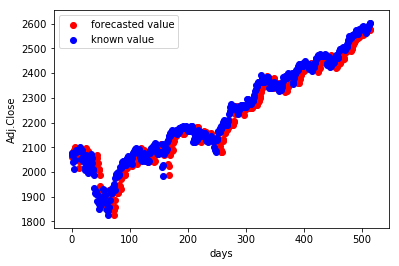

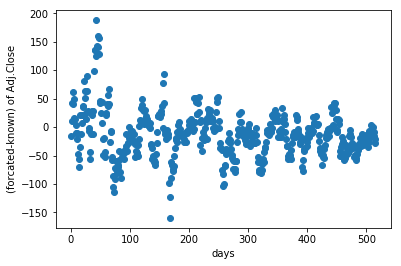

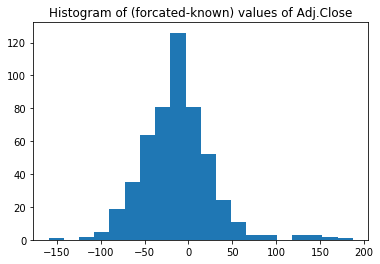

In [20]:
plt.figure(3)  
plt.hist(diff, bins=20)
plt.title('Histogram of (forcated-known) values of Adj.Close')
plt.show()